# Import the required Libraries

In [7]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [3]:
Bank_df = pd.read_csv('/Users/ashutoshfolane/Documents/VIBHUTI/Git_Repos/Datasets/bank.csv')

In [4]:
Bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


We start by looking for missing data.

In [6]:
Bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

It appears that there are no missing entries in the dataset. Let's plot some of the key attributes and see if anything stands out.

In [10]:
balance_Df =Bank_df[['education','balance']] 
marital_Df =Bank_df[['marital','balance']] 

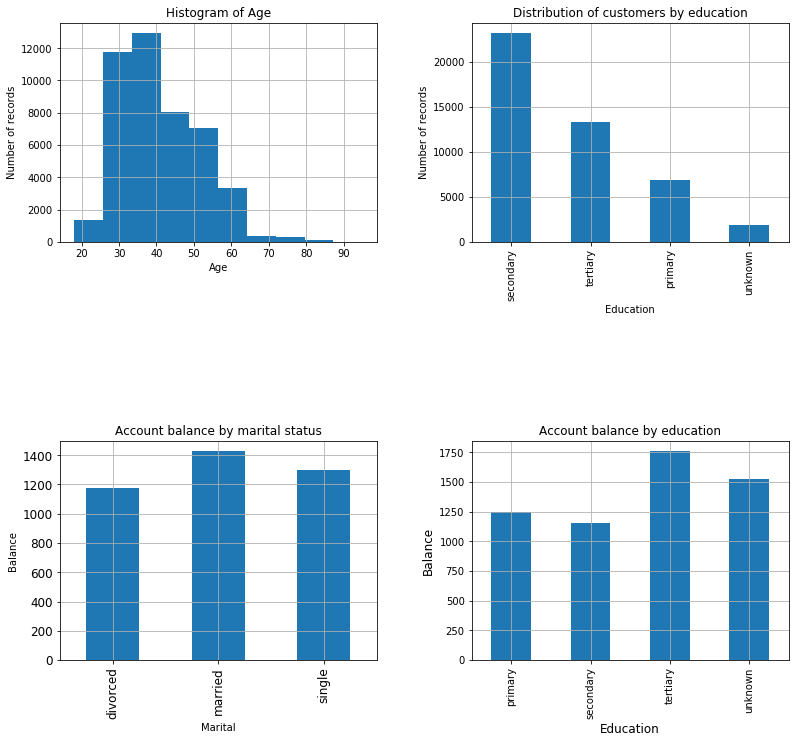

In [11]:
#check outliers
f = plt.figure()

ax1 = f.add_subplot(221)
Bank_df["age"].plot(ax = ax1, kind="hist", title ="Histogram of Age")
ax1.grid(True)
ax1.set_xlabel("Age")
ax1.set_ylabel("Number of records")

ax2 = f.add_subplot(222)
balance_Df["education"].value_counts().plot(ax = ax2, kind="bar", title ="Distribution of customers by education")
ax2.set_xlabel("Education")
ax2.set_ylabel("Number of records")
ax2.grid(True)

ax3 = f.add_subplot(223)
marital_Df.groupby("marital").mean().plot(ax = ax3, kind='bar', title ="Account balance by marital status", figsize=(8, 6), legend=False, fontsize=12)
ax3.set_xlabel("Marital")
ax3.set_ylabel("Balance")
ax3.grid(True)

ax4 = f.add_subplot(224)
balance_Df.groupby("education").mean().plot(ax = ax4, kind='bar', legend=False, title ="Account balance by education")
ax4.set_xlabel("Education", fontsize=12)
ax4.set_ylabel("Balance", fontsize=12)
ax4.grid(True)

f.tight_layout()
f.set_figheight(12)
f.set_figwidth(12)

Let also look at the descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [12]:
Bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


By looking at the data sample, the descriptive statistics, and the plots makes it apparent that there are two issues we have to take care of:

- There is actually some missing data, the "unknwon" entries. We can try to impute the missing values or simply apply complete case analysis

- Some of the attributes in the dataset are categorical. We'll have to unpack them using dummy variables to make the dataset more suitable for the application of machine learning algorithms.

# Data Wrangling

In [14]:
Bank_df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

unpacking all categorical attributes in the dataset.

In [15]:
res = pd.get_dummies(Bank_df)

res.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_no', 'y_yes'], dtype=object)

We notice plenty of columns for unknown attribute values. If we look at the unique values of the individual attributes we can indeed confirm that some missing data is present in the dataset.

In [17]:
pd.unique(Bank_df["poutcome"])

array(['unknown', 'failure', 'other', 'success'], dtype=object)

Let see how many records are in the dataset and what's left if we only retain the complete cases.

In [20]:
n_observations = len(Bank_df)
print("Number of Observation:", n_observations)

complete_df= Bank_df[Bank_df['poutcome']!='unknown']
complete_df = complete_df[complete_df["job"]!="unknown"]
complete_df = complete_df[complete_df["education"]!="unknown"]
complete_df = complete_df[complete_df["contact"]!="unknown"]

n_complete_cases = len(complete_df)

print("Number of complete observations: %i " % n_complete_cases)
print("Retained records: %.2f%%" % (n_complete_cases*100/n_observations))


Number of Observation: 45211
Number of complete observations: 7842 
Retained records: 17.35%


It appears that complete case analysis is quite impractical in this situation.

Let's try something a bit more clever. We'll move the target variable from the complete cases set to a dedicated labels data frame, and build an attribute importance model.

In [21]:
complete_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
24086,44,blue-collar,married,secondary,no,1324,yes,no,telephone,25,oct,119,1,89,2,other,no
24122,26,technician,single,tertiary,no,172,no,yes,telephone,4,nov,21,1,140,4,other,no
24127,51,admin.,single,secondary,no,3132,no,no,telephone,5,nov,449,1,176,1,failure,no
24151,33,unemployed,divorced,secondary,no,1005,yes,no,telephone,10,nov,175,1,174,2,failure,no
24165,30,admin.,married,secondary,no,873,yes,no,telephone,12,nov,119,1,167,3,success,no


In [25]:
complete_targetDF = pd.Categorical(complete_df["y"])
complete_targetDF = complete_targetDF.codes
complete_targetDF

array([0, 1, 1, ..., 1, 1, 0], dtype=int8)

In [27]:
complete_inputDF = complete_df.drop("y", axis=1)
complete_inputDF = pd.get_dummies(complete_inputDF)
complete_inputDF

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
24060,33,882,21,39,1,151,3,1,0,0,...,0,0,0,0,0,1,0,1,0,0
24062,42,-247,21,519,1,166,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
24064,33,3444,21,144,1,91,4,0,0,0,...,0,0,0,0,0,1,0,1,0,0
24072,36,2415,22,73,1,86,4,0,0,0,...,0,0,0,0,0,1,0,0,1,0
24077,36,0,23,140,1,143,3,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,1475,16,1166,3,530,12,0,1,0,...,0,0,0,0,1,0,0,0,1,0
45201,53,583,17,226,1,184,4,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45204,73,2850,17,300,1,40,8,0,0,0,...,0,0,0,0,1,0,0,1,0,0
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,0,1,0,0,0,0,1


We can now train an extra trees classifier. This classifier implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. We can then look at the importance of each individual attribute and decide what to retain in the dataset.

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
from IPython.display import display, HTML

# fit an Extra Trees model to the data
model = ExtraTreesClassifier(n_estimators=10)
model.fit(complete_inputDF, complete_targetDF)

# display the relative importance of each attribute

attrDF = pd.DataFrame(np.column_stack((complete_inputDF.columns.values,model.feature_importances_)), columns=("Attribute","Importance"))
display(attrDF.sort_values("Importance"))


,Attribute,Importance
24,default_no,0.000798336
25,default_yes,0.000913124
10,job_housemaid,0.00361456
9,job_entrepreneur,0.00376615
17,job_unemployed,0.00496394
34,month_dec,0.00498737
15,job_student,0.00541445
13,job_self-employed,0.0055089
29,loan_yes,0.00620504
36,month_jan,0.00642481


We can now focus on a subset of important features. It appears that most of the "unknowns" are in less important attributes anyway, so we don't have to discard much data.

The importance of the call duration (the duration attribute) is, however, quite suspicious.



In [29]:
np.corrcoef(complete_inputDF["duration"], complete_targetDF)

array([[1.        , 0.34634231],
       [0.34634231, 1.        ]])

Although the Pearson correlation coefficient suggests a weak uphill (positive) linear relationship it is better to discard this attribute from the set.

If we think about it, this attribute highly affects the output target as the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Let's now prepare the final training data frame.

In [31]:
trainingDataDF = pd.get_dummies(Bank_df[["poutcome", "age", "balance", "previous", "housing", "marital"]])
trainingDataDF =trainingDataDF[["poutcome_success", "age", "balance", "previous", "housing_no", "housing_yes", "marital_divorced", "marital_married", "marital_single"]]
trainingTargetDF = pd.Categorical(Bank_df["y"])
trainingTargetDF = trainingTargetDF.codes
trainingTargetDF

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

Let's look at the first handful of observations.

In [32]:
trainingDataDF.head()

,poutcome_success,age,balance,previous,housing_no,housing_yes,marital_divorced,marital_married,marital_single
0,0,58,2143,0,0,1,0,1,0
1,0,44,29,0,0,1,0,0,1
2,0,33,2,0,0,1,0,1,0
3,0,47,1506,0,0,1,0,1,0
4,0,33,1,0,1,0,0,0,1


What was the amount of discarded records after applying the attribute importance strategy?

In [33]:
n_training = trainingDataDF.shape[0]
print("Number of retained observations: %i " % n_training)
print("Percentage of data retained: %.2f%%" % (n_training*100/n_observations))

Number of retained observations: 45211 
Percentage of data retained: 100.00%


# Training a predictive model

Let's split the data into a training a test sets.

We retain 20% of the data for measuring the generalisation of the model.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(trainingDataDF, trainingTargetDF, test_size=0.20, random_state=1234)

We will now train a logistic regression model, where the linear combination of input features is passed through a sigmoid function to make a class prediction. The standard scikit logit model also applies L2 regularization by default.

In [35]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression(solver="liblinear", max_iter=200)
logistic.fit(X_train, y_train)

print("Model coefficients:")
print(logistic.coef_, "\n")

print("Model intercept:")
print(logistic.intercept_)

Model coefficients:
[[ 2.49844253e+00  6.75033969e-03  2.76656422e-05  6.00271754e-02
  -3.10278176e-01 -1.06184203e+00 -4.79242403e-01 -6.95015333e-01
  -1.97862473e-01]] 

Model intercept:
[-1.37212021]


Now that we have a trained model we can make a prediction on the test data and measure the prediction accuracy.

In [37]:
from sklearn.metrics import accuracy_score

y_pred = logistic.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Prediction accuracy: %.2f%%" % (100*acc))

Prediction accuracy: 89.16%


This looks suspiciously good for a first attempt. Let's look at the distribution of the two outcome classes in the input dataset.

(array([7996., 1047.]), array([0, 1, 2]), <a list of 2 Patch objects>)

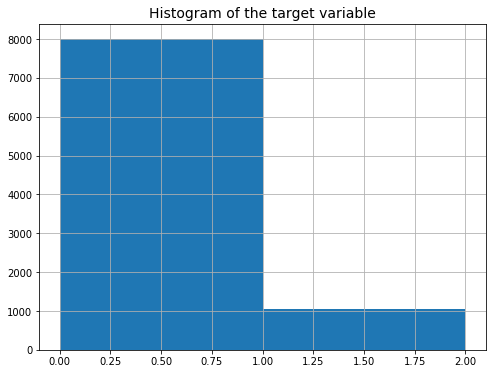

In [38]:
%matplotlib inline

f = plt.figure(figsize=(8,6))
plt.title("Histogram of the target variable", fontsize=14)
plt.grid()
plt.hist(y_test, bins=[0, 1,2])

It looks like we are dealing with a highly unbalanced data set, so the weight of the true negatives is skewing the accuracy statistics.

This is also easily confirmed by looking at the confusion matrix for the predictions.



In [40]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,7900,96,7996
1,884,163,1047
All,8784,259,9043


We can fix this by sampling the training set and making sure that the positive/negative ratio is 50:50.

In [41]:
# Get all positive
trainingDataPositiveDF = Bank_df[Bank_df["y"] == "yes"]
trainingDataNegativeDF = Bank_df[Bank_df["y"] == "no"].sample(n = len(trainingDataPositiveDF))
trainingDataDF = trainingDataPositiveDF.append(trainingDataNegativeDF)


In [42]:
# Merge
trainingTargetDF = pd.Categorical(trainingDataDF["y"])
trainingTargetDF = trainingTargetDF.codes

trainingDataDF = pd.get_dummies(trainingDataDF[["duration", "poutcome", "age", "balance", "previous", "housing", "marital"]])
trainingDataDF =trainingDataDF[["duration", "poutcome_success", "age", "balance", "previous", "housing_no", "housing_yes", "marital_divorced", "marital_married", "marital_single"]]



Let's split the sampled subset to a training/test sets and plot the distribution of the target variable.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(trainingDataDF, trainingTargetDF, test_size=0.20, random_state=1)

(array([1028., 1088.]), array([0, 1, 2]), <a list of 2 Patch objects>)

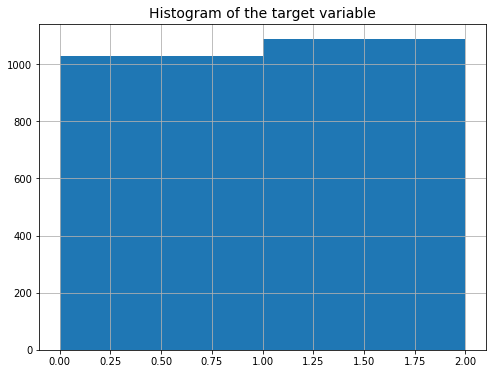

In [44]:
%matplotlib inline

f = plt.figure(figsize=(8,6))
plt.title("Histogram of the target variable", fontsize=14)
plt.grid()
plt.hist(y_test, bins=[0, 1,2])

We can now train and evaluate a new logistic regression model.

In [46]:
logistic = linear_model.LogisticRegression(solver="liblinear", max_iter=200)
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
accuracy_score(y_test, y_pred)

0.7840264650283554

The new model is more realistic and not biased towards the negative responses.

In [47]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,860,168,1028
1,289,799,1088
All,1149,967,2116
